In [118]:
import numpy as np
import scipy
import scipy.sparse as sparse
import copy
import random
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm 

In [119]:
import ssnmf
del ssnmf
import ssnmf
from ssnmf import SSNMF


In [120]:
def scalingC(unscaledC):
    #if C is nxm
    #make diag mx of mxm
    cols = np.shape(unscaledC)[1]
    scaling = np.zeros((cols, cols))

    invScalingArr = unscaledC.sum(axis=0)
    scalingArr = 1./invScalingArr
    
    np.fill_diagonal(scaling, scalingArr)
    C = unscaledC @ scaling
    
    np.fill_diagonal(scaling,invScalingArr)
    return C, scaling

In [121]:
S_c = np.random.rand(10,40)
C_c = np.random.rand(40,10)

C_c_scaled, scaling = scalingC(C_c)

Z = C_c @ S_c
Z_scaled = C_c_scaled @ scaling @ S_c
Z


array([[0.85277834, 1.25233301, 2.11041051, ..., 1.47330772, 1.43072596,
        1.9629273 ],
       [1.0142692 , 1.47558098, 1.88475913, ..., 1.96826039, 1.09775519,
        1.83171074],
       [1.68355024, 2.45652956, 2.7125155 , ..., 2.27598176, 1.62507351,
        2.60679952],
       ...,
       [2.52979138, 3.78045883, 3.77288865, ..., 3.10122812, 1.64804076,
        3.20687014],
       [1.32311764, 2.15616803, 2.66967538, ..., 1.96523492, 1.28194064,
        2.54058759],
       [1.74550413, 2.31847175, 2.80507124, ..., 2.72824968, 1.44262276,
        2.94547039]])

In [122]:
Z_scaled

array([[0.85277834, 1.25233301, 2.11041051, ..., 1.47330772, 1.43072596,
        1.9629273 ],
       [1.0142692 , 1.47558098, 1.88475913, ..., 1.96826039, 1.09775519,
        1.83171074],
       [1.68355024, 2.45652956, 2.7125155 , ..., 2.27598176, 1.62507351,
        2.60679952],
       ...,
       [2.52979138, 3.78045883, 3.77288865, ..., 3.10122812, 1.64804076,
        3.20687014],
       [1.32311764, 2.15616803, 2.66967538, ..., 1.96523492, 1.28194064,
        2.54058759],
       [1.74550413, 2.31847175, 2.80507124, ..., 2.72824968, 1.44262276,
        2.94547039]])

In [123]:
##note: todo

##FIX ACCURACY  line 700???

## everytime we update c, we want to rescale c so that the columns add to 1?
## and then we use the scale that we used on c (a diag mx.), invert it (i.e. 100 -> 1/100) and multiply S with it.


In [124]:
##generating data
##have to make sure that the columns of C sum to one, with the same technique


# Initializing 

In [125]:
labelmat_c = np.concatenate((np.concatenate((np.ones([1,10]),np.zeros([1,30])),axis=1),
                           np.concatenate((np.zeros([1,10]),np.ones([1,10]),np.zeros([1,20])),axis=1),
                           np.concatenate((np.zeros([1,20]),np.ones([1,10]),np.zeros([1,10])),axis=1),
                           np.concatenate((np.zeros([1,30]),np.ones([1,10])),axis=1)))

S_c = np.random.rand(10,40)
I_c = np.zeros((40, 40), int)
np.fill_diagonal(I_c, 1)

C_c = np.zeros([40,10])
for i in range(40):
    C_c[i,:] = opt.nnls(np.transpose(S_c),I_c[:,i])[0]
    
C_c, scaling = scalingC(C_c)
S_c = scaling @ S_c

A_c = np.random.rand(40,10)
X_c = A_c @ S_c



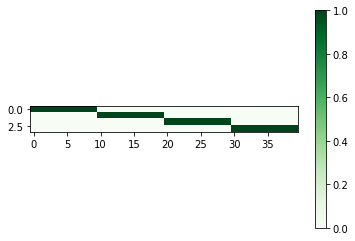

In [126]:
#z_min, z_max = -np.abs(labelmat).max(), np.abs(labelmat).max() 
a = plt.imshow(labelmat_c, cmap ='Greens') 
plt.colorbar(a) 

plt.show() 

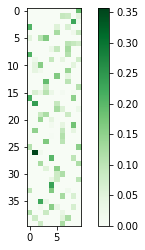

In [127]:
b = plt.imshow(C_c, cmap ='Greens') 
plt.colorbar(b) 

plt.show() 

In [128]:
#check nonnegativity of C_c
print(np.min(C_c))
print(np.min(labelmat_c @ C_c))

0.0
0.0


## Train

In [129]:
allModelNum = [7,8,9,10,11,12]

Model Number:7
the initial relative reconstruction error is  303218463.640749
the initial classifier's accuracy is  0.35
number of iterations that this model runs:  159
the final relative reconstruction error is  0.00200133628324663
the final classifier's accuracy is  0.225


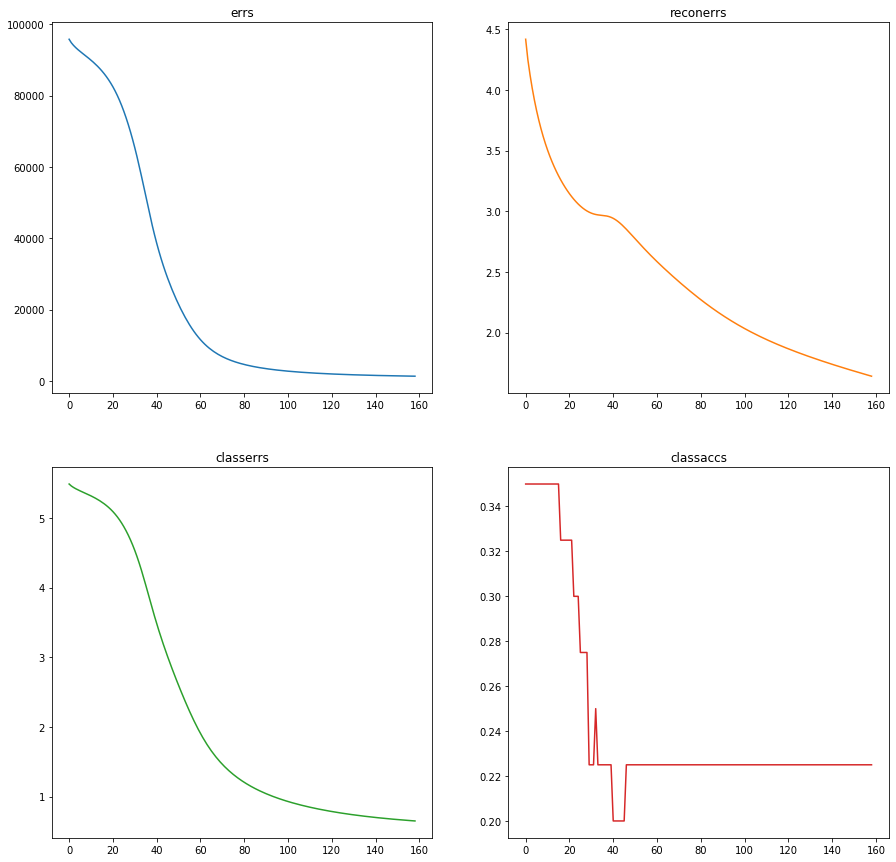

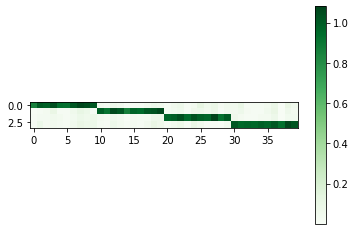

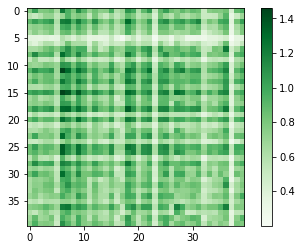

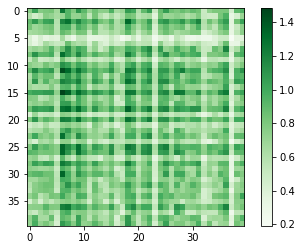

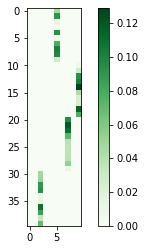

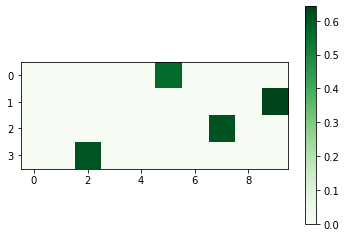

Model Number:8
the initial relative reconstruction error is  287474239.1115663
the initial classifier's accuracy is  0.225
number of iterations that this model runs:  174
the final relative reconstruction error is  0.002134380628249529
the final classifier's accuracy is  0.375


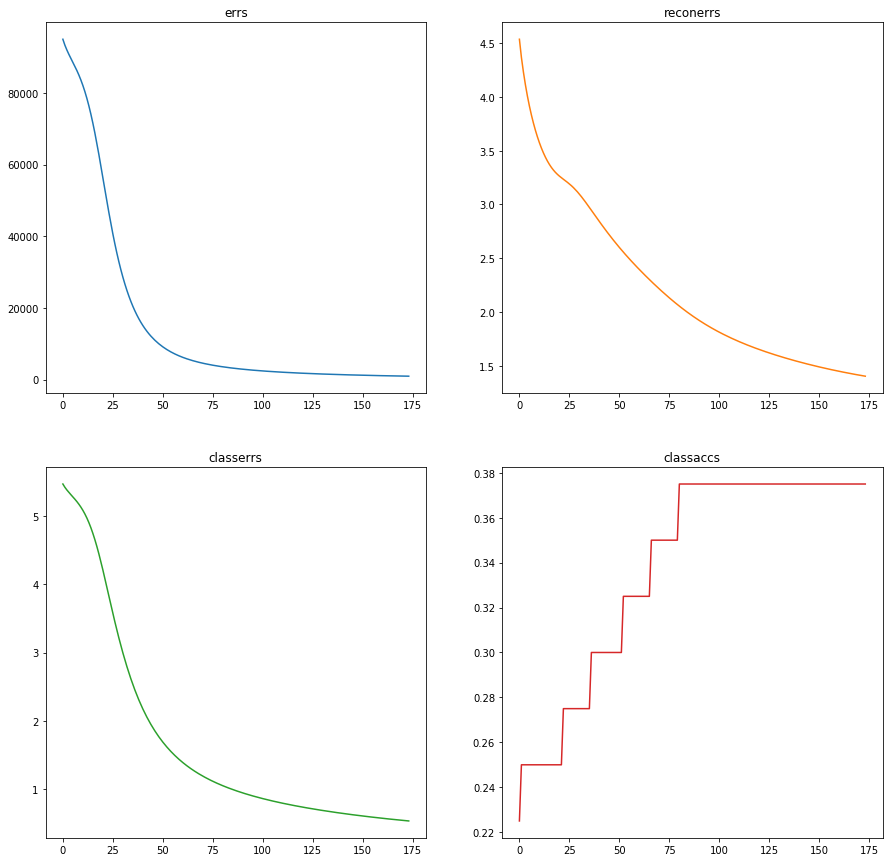

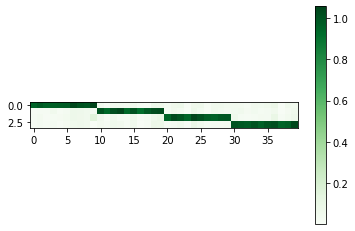

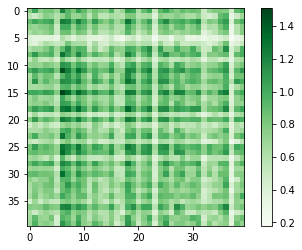

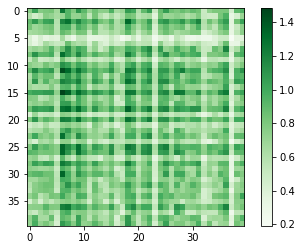

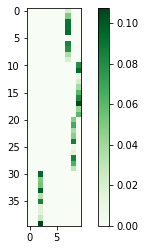

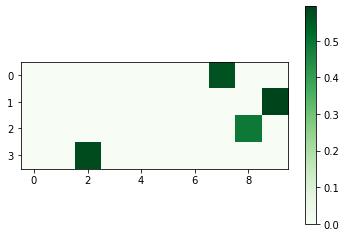

Model Number:9
the initial relative reconstruction error is  322899989.99970824
the initial classifier's accuracy is  0.225
number of iterations that this model runs:  121
the final relative reconstruction error is  0.0004780483174759724
the final classifier's accuracy is  0.05


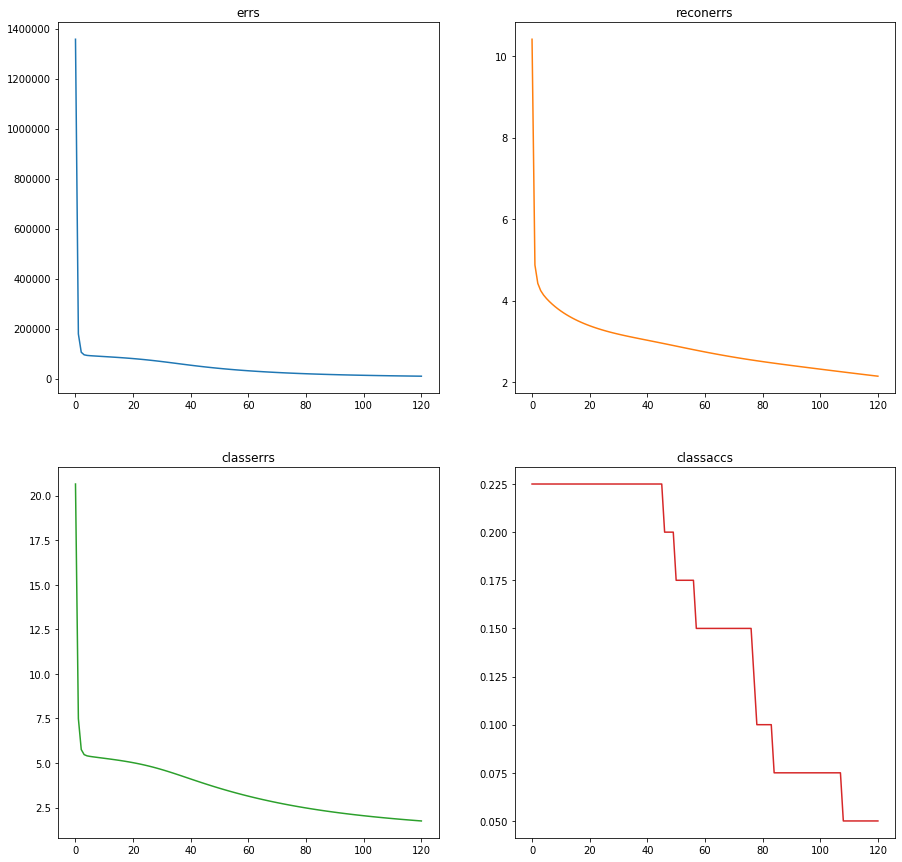

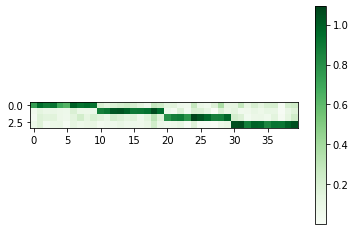

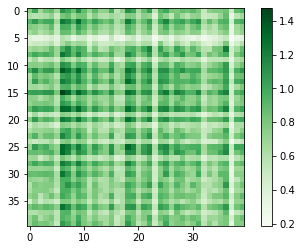

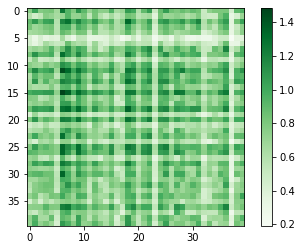

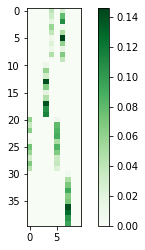

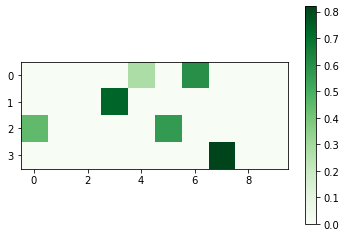

Model Number:10
the initial relative reconstruction error is  326636459.3195648
the initial classifier's accuracy is  0.275
number of iterations that this model runs:  162
the final relative reconstruction error is  0.002368370476277374
the final classifier's accuracy is  0.175


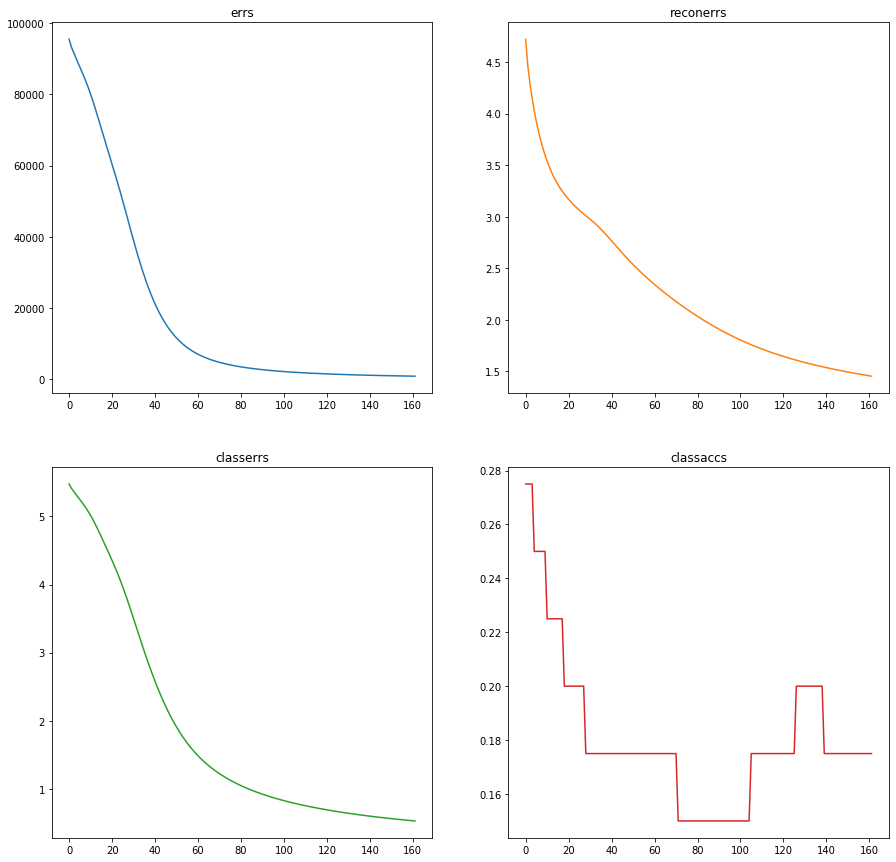

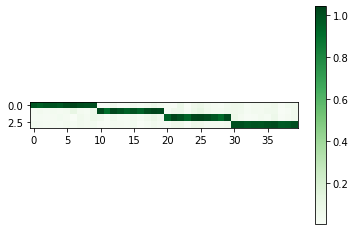

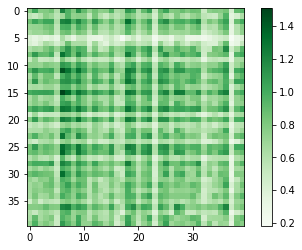

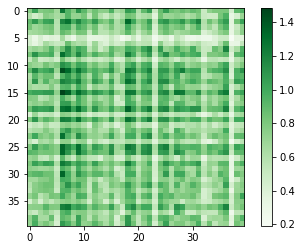

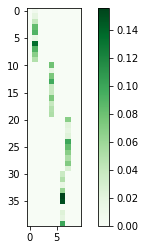

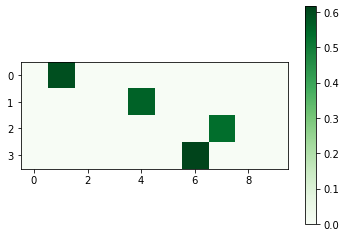

Model Number:11
the initial relative reconstruction error is  319546582.2296332
the initial classifier's accuracy is  0.3
number of iterations that this model runs:  170
the final relative reconstruction error is  9.872695515251205e-05
the final classifier's accuracy is  1.0


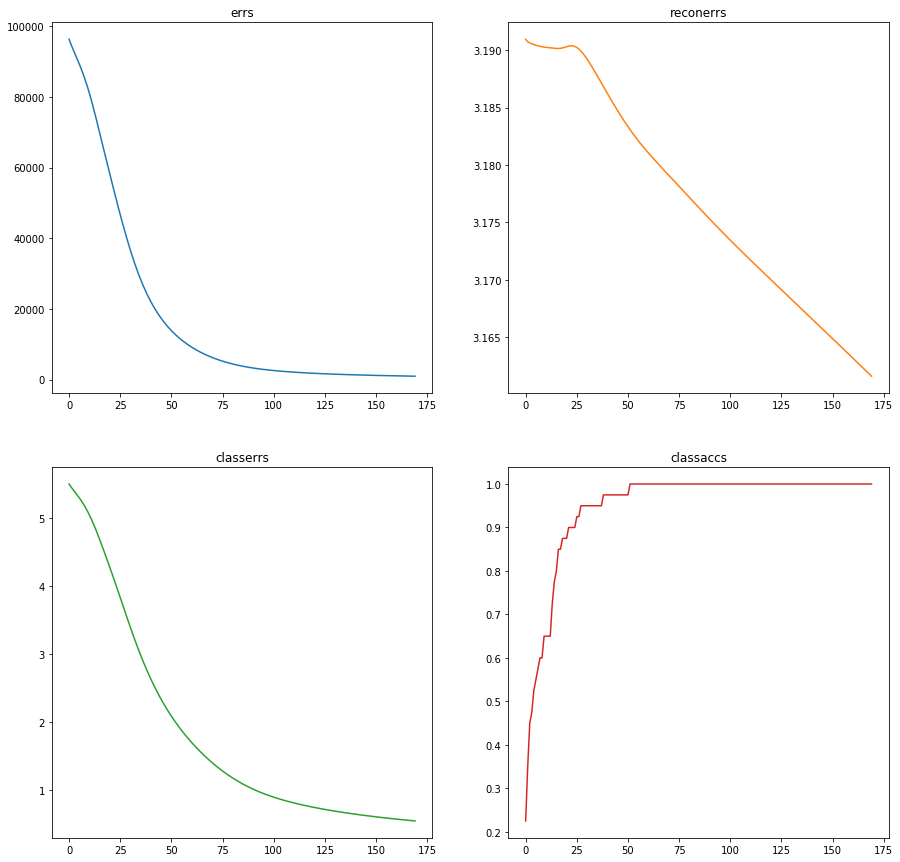

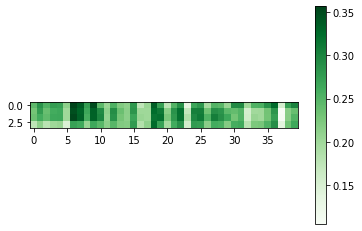

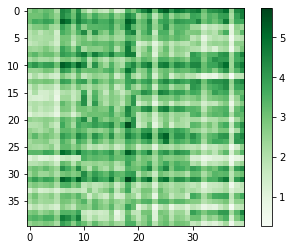

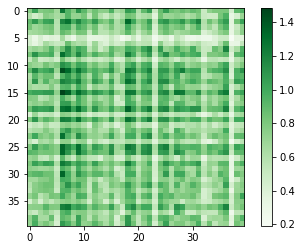

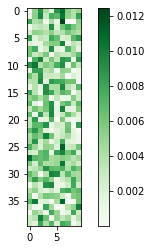

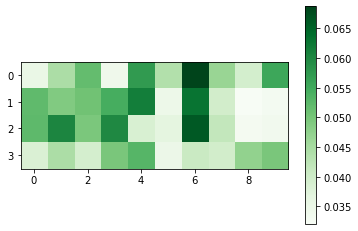

Model Number:12
the initial relative reconstruction error is  318228178.9637069
the initial classifier's accuracy is  0.25
number of iterations that this model runs:  474
the final relative reconstruction error is  0.001004417973502475
the final classifier's accuracy is  0.35


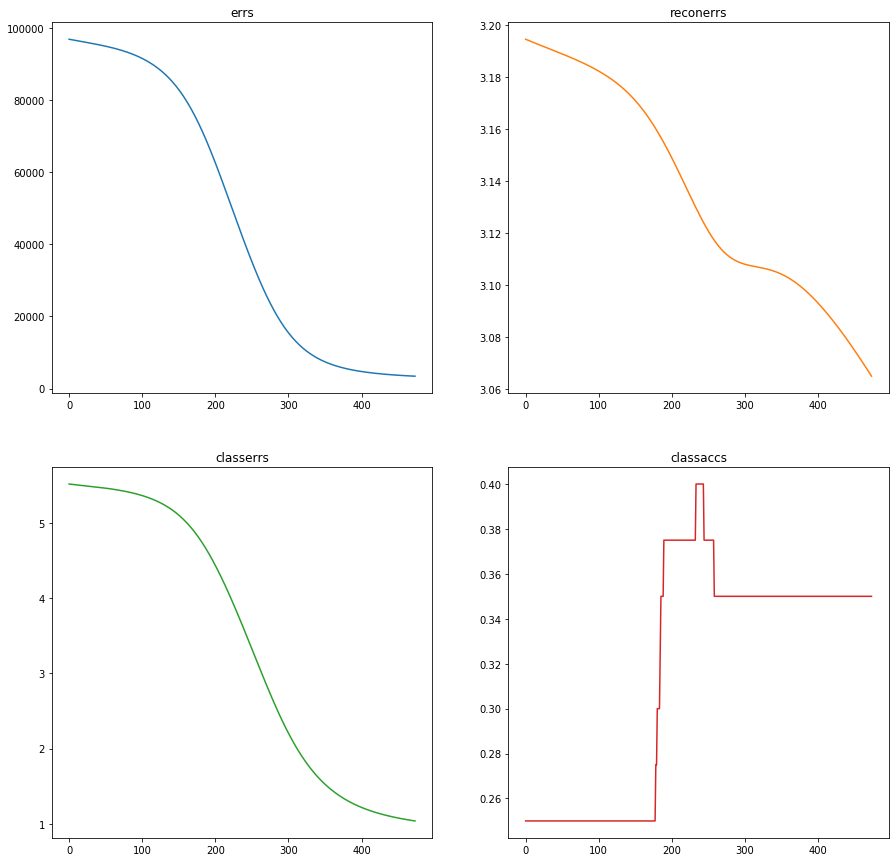

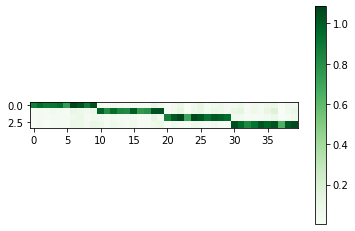

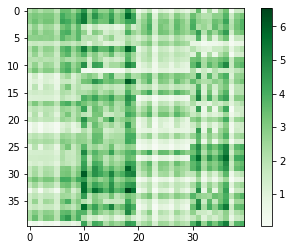

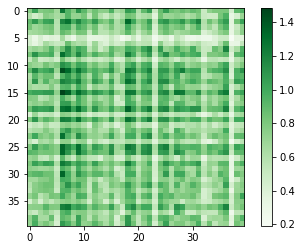

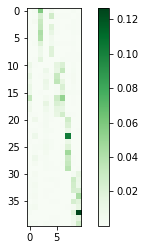

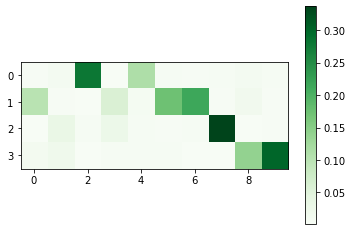

In [130]:
for modelNum in allModelNum:
    print('Model Number:' + str(modelNum))
    k = 10
    model = SSNMF(X_c,k,Y = labelmat_c,lam=100*np.linalg.norm(X_c,'fro'),modelNum=modelNum)
    ini_error = model.fronorm(model.X, model.A, model.S, model.W)**2 + model.lam * model.fronorm_c(model.Y, model.C, model.S, model.L)**2

    #initial accuracy
    acc = model.accuracy()
    print("the initial relative reconstruction error is ", ini_error)
    print("the initial classifier's accuracy is ", acc)


    #final reconstruction error
    N = 10000
    [errs,reconerrs,classerrs,classaccs] = model.mult(numiters = N,saveerrs = True)
    size = reconerrs.shape[0]
    rel_error = reconerrs[size - 1]**2/(model.fronorm(model.X, model.A, model.S, model.W)**2 + model.lam * model.fronorm_c(model.Y, model.C, model.S, model.L)**2)
    acc = classaccs[size - 1]
    print("number of iterations that this model runs: ", size)
    print("the final relative reconstruction error is ", rel_error)
    print("the final classifier's accuracy is ", acc)

    #plot accuracy
    fig, axs = plt.subplots(2, 2,figsize=(15,15))
    axs[0, 0].plot(range(0,size), errs)
    axs[0, 0].set_title('errs')
    axs[0, 1].plot(range(0,size), reconerrs, 'tab:orange')
    axs[0, 1].set_title('reconerrs')
    axs[1, 0].plot(range(0,size), classerrs, 'tab:green')
    axs[1, 0].set_title('classerrs')
    axs[1, 1].plot(range(0,size), classaccs, 'tab:red')
    axs[1, 1].set_title('classaccs')

    plt.figure()  
    d = plt.imshow(model.Y @ model.C @ model.S,cmap = 'Greens')
    plt.colorbar(d) 
    plt.show() 

    e = plt.imshow(model.A @ model.S,cmap = 'Greens')
    plt.colorbar(e)
    plt.show()

    f = plt.imshow(X_c,cmap = 'Greens')
    plt.colorbar(f)
    plt.show()

    g = plt.imshow(model.C,cmap = 'Greens')
    plt.colorbar(g)
    plt.show()

    h = plt.imshow(model.Y @ model.C,cmap = 'Greens')
    plt.colorbar(h)
    plt.show()

# Compare to normal FF

In [131]:
model2 = SSNMF(X_c,k,Y = labelmat_c,lam=100*np.linalg.norm(X_c,'fro'), modelNum = 3)

In [132]:
ini_error_ = model2.fronorm(model2.X, model2.A, model2.S, model2.W)**2 + model2.lam * model2.fronorm(model2.Y, model2.B, model2.S, model2.L)**2
acc_ = model2.accuracy()
print("the initial relative reconstruction error is ", ini_error_)
print("the initial classifier's accuracy is ", acc_)

the initial relative reconstruction error is  3505292.658092104
the initial classifier's accuracy is  0.225


In [133]:
N = 10000
[errs_,reconerrs_,classerrs_,classaccs_] = model2.mult(numiters = N,saveerrs = True)

In [134]:
size = reconerrs_.shape[0]
rel_error_ = reconerrs_[size - 1]**2/(model2.fronorm(model2.X, model2.A, model2.S, model2.W)**2 + model2.lam * model2.fronorm(model2.Y, model2.B, model2.S, model2.L)**2)
acc_ = classaccs_[size - 1]
print("number of iterations that this model runs: ", size)
print("the final relative reconstruction error is ", rel_error_)
print("the final classifier's accuracy is ", acc_)

number of iterations that this model runs:  18
the final relative reconstruction error is  0.3946700044621657
the final classifier's accuracy is  1.0


Text(0.5, 1.0, 'classaccs')

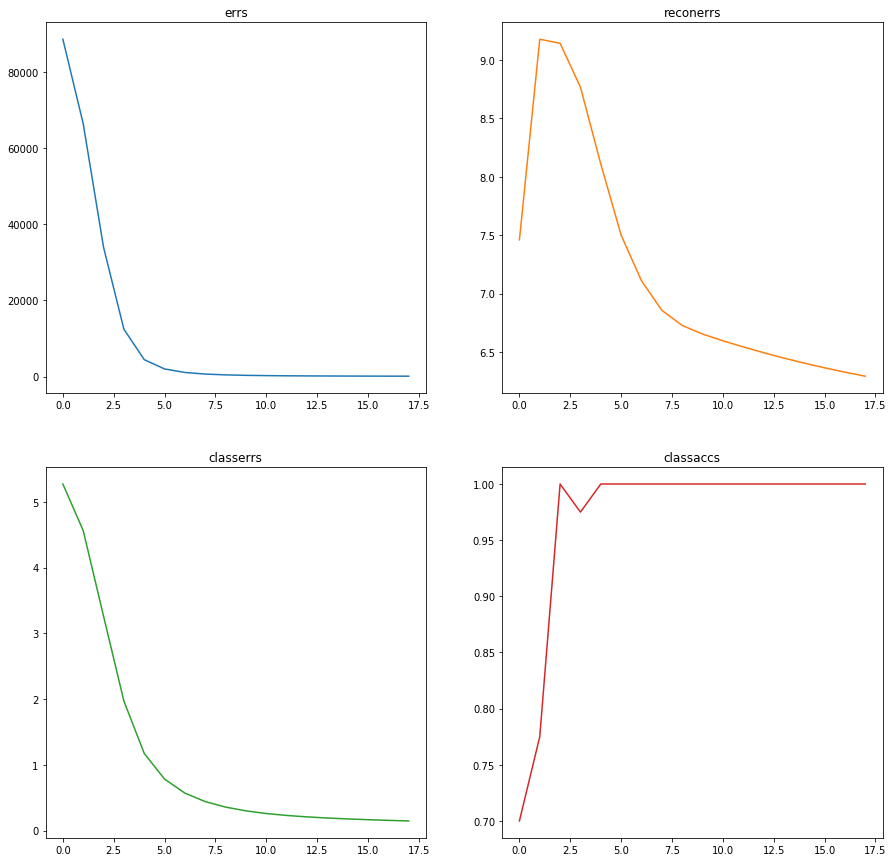

In [135]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].plot(range(0,size), errs_)
axs[0, 0].set_title('errs')
axs[0, 1].plot(range(0,size), reconerrs_, 'tab:orange')
axs[0, 1].set_title('reconerrs')
axs[1, 0].plot(range(0,size), classerrs_, 'tab:green')
axs[1, 0].set_title('classerrs')
axs[1, 1].plot(range(0,size), classaccs_, 'tab:red')
axs[1, 1].set_title('classaccs')